In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("breast_cancer.csv")
data.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
data["Class"].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [4]:
data["Class"]=data["Class"].map({2:0,4:1})

In [5]:
data.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [6]:
x=data.drop(["Class"],axis=1)
y=data["Class"]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
lr.fit(x_train,y_train)

LogisticRegression()

In [11]:
y_pred=lr.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

In [25]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9562043795620438


In [26]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[78  1]
 [ 5 53]]


In [27]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

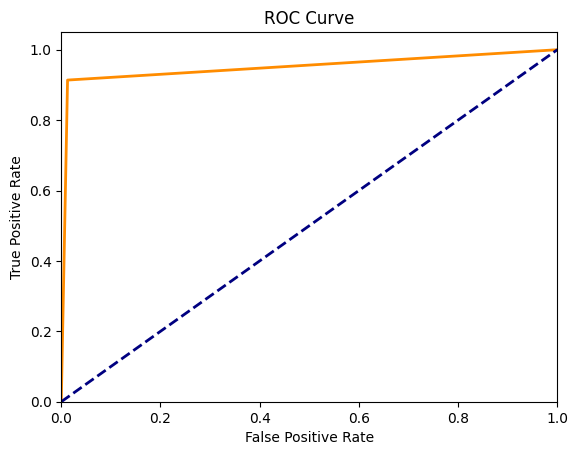

In [40]:
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()